# Welcome to our NASA Challenge

## Seismic Detection Across The Solar System

### ObsPy: A powerful library for reading and processing seismic data, especially .miniseed files.
### NumPy and Pandas: For handling data and doing calculations.
### Matplotlib and Seaborn: For plotting your results, such as the seismic waveforms and spectrograms.
### Sklearn : For Label Encoding, Train_Test_split, Random_Forest and Evaluation Metrics

# Importing Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import os
from obspy.signal.trigger import classic_sta_lta

In [2]:
# Read The CSV File into DataFrame 
lunar = pd.read_csv("apollo12_catalog_GradeA_final.csv")
lunar.head()

,filename,time_abs(%Y-%m-%dT%H:%M:%S.%f),time_rel(sec),evid,mq_type
0,xa.s12.00.mhz.1970-01-19HR00_evid00002,1970-01-19T20:25:00.000000,73500.0,evid00002,impact_mq
1,xa.s12.00.mhz.1970-03-25HR00_evid00003,1970-03-25T03:32:00.000000,12720.0,evid00003,impact_mq
2,xa.s12.00.mhz.1970-03-26HR00_evid00004,1970-03-26T20:17:00.000000,73020.0,evid00004,impact_mq
3,xa.s12.00.mhz.1970-04-25HR00_evid00006,1970-04-25T01:14:00.000000,4440.0,evid00006,impact_mq
4,xa.s12.00.mhz.1970-04-26HR00_evid00007,1970-04-26T14:29:00.000000,52140.0,evid00007,deep_mq


In [3]:
lunar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   filename                        76 non-null     object 
 1   time_abs(%Y-%m-%dT%H:%M:%S.%f)  76 non-null     object 
 2   time_rel(sec)                   76 non-null     float64
 3   evid                            76 non-null     object 
 4   mq_type                         76 non-null     object 
dtypes: float64(1), object(4)
memory usage: 3.1+ KB


In [4]:
# Convert 'time_abs(%Y-%m-%dT%H:%M:%S.%f)' to pandas datetime format
lunar['time_abs(%Y-%m-%dT%H:%M:%S.%f)'] = pd.to_datetime(lunar['time_abs(%Y-%m-%dT%H:%M:%S.%f)'])

lunar.head()

,filename,time_abs(%Y-%m-%dT%H:%M:%S.%f),time_rel(sec),evid,mq_type
0,xa.s12.00.mhz.1970-01-19HR00_evid00002,1970-01-19 20:25:00,73500.0,evid00002,impact_mq
1,xa.s12.00.mhz.1970-03-25HR00_evid00003,1970-03-25 03:32:00,12720.0,evid00003,impact_mq
2,xa.s12.00.mhz.1970-03-26HR00_evid00004,1970-03-26 20:17:00,73020.0,evid00004,impact_mq
3,xa.s12.00.mhz.1970-04-25HR00_evid00006,1970-04-25 01:14:00,4440.0,evid00006,impact_mq
4,xa.s12.00.mhz.1970-04-26HR00_evid00007,1970-04-26 14:29:00,52140.0,evid00007,deep_mq


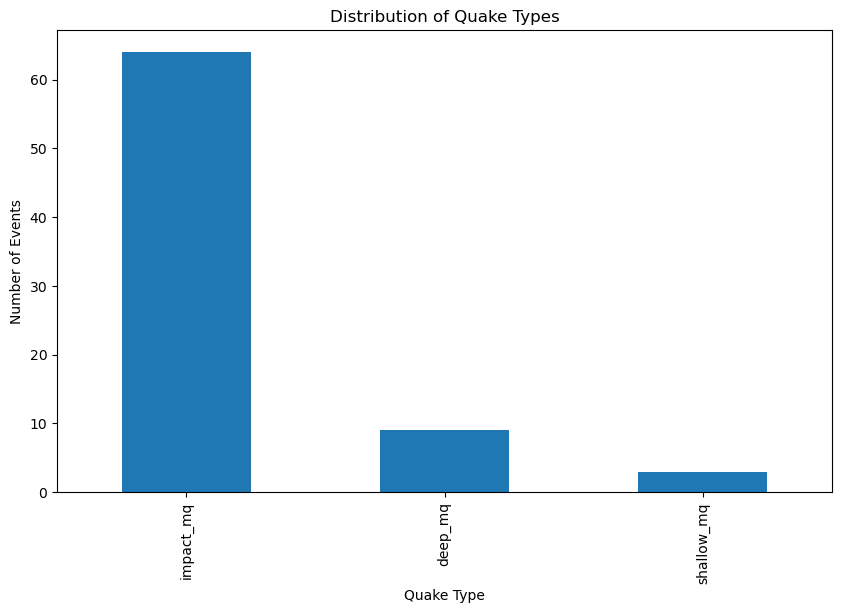

In [5]:
# Plot the distribution of quake types
lunar['mq_type'].value_counts().plot(kind='bar', title="Distribution of Quake Types", figsize=(10, 6))
plt.xlabel("Quake Type")
plt.ylabel("Number of Events")
plt.show()

# [Logistic Regression & Random Forest Machine Learning Models]

In [6]:
# Feature Engineering: Extract hour, day, month, etc., from Abs_Time
lunar['Hour'] = lunar['time_abs(%Y-%m-%dT%H:%M:%S.%f)'].dt.hour
lunar['Day'] = lunar['time_abs(%Y-%m-%dT%H:%M:%S.%f)'].dt.day
lunar['Month'] = lunar['time_abs(%Y-%m-%dT%H:%M:%S.%f)'].dt.month
lunar['Year'] = lunar['time_abs(%Y-%m-%dT%H:%M:%S.%f)'].dt.year

In [7]:
# Encode the 'filename' as numeric using LabelEncoder
file_name_encoder = LabelEncoder()
lunar['File_Name_Encoded'] = file_name_encoder.fit_transform(lunar['filename'])

# Encode the target variable 'mq_type' as numeric
quake_type_encoder = LabelEncoder()
lunar['MQ_Type_Encoded'] = quake_type_encoder.fit_transform(lunar['mq_type'])

In [8]:
lunar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   filename                        76 non-null     object        
 1   time_abs(%Y-%m-%dT%H:%M:%S.%f)  76 non-null     datetime64[ns]
 2   time_rel(sec)                   76 non-null     float64       
 3   evid                            76 non-null     object        
 4   mq_type                         76 non-null     object        
 5   Hour                            76 non-null     int64         
 6   Day                             76 non-null     int64         
 7   Month                           76 non-null     int64         
 8   Year                            76 non-null     int64         
 9   File_Name_Encoded               76 non-null     int32         
 10  MQ_Type_Encoded                 76 non-null     int32         
dtypes: datet

In [9]:
lunar.head()

,filename,time_abs(%Y-%m-%dT%H:%M:%S.%f),time_rel(sec),evid,mq_type,Hour,Day,Month,Year,File_Name_Encoded,MQ_Type_Encoded
0,xa.s12.00.mhz.1970-01-19HR00_evid00002,1970-01-19 20:25:00,73500.0,evid00002,impact_mq,20,19,1,1970,0,1
1,xa.s12.00.mhz.1970-03-25HR00_evid00003,1970-03-25 03:32:00,12720.0,evid00003,impact_mq,3,25,3,1970,1,1
2,xa.s12.00.mhz.1970-03-26HR00_evid00004,1970-03-26 20:17:00,73020.0,evid00004,impact_mq,20,26,3,1970,2,1
3,xa.s12.00.mhz.1970-04-25HR00_evid00006,1970-04-25 01:14:00,4440.0,evid00006,impact_mq,1,25,4,1970,3,1
4,xa.s12.00.mhz.1970-04-26HR00_evid00007,1970-04-26 14:29:00,52140.0,evid00007,deep_mq,14,26,4,1970,4,0


In [10]:
# Drop columns that won't be used for classification (Abs_Time, File Name of Event, etc.)
features = lunar.drop(columns=['time_abs(%Y-%m-%dT%H:%M:%S.%f)', 'filename', 'mq_type', 'MQ_Type_Encoded', 'evid'])

# Define the target variable
target = lunar['MQ_Type_Encoded']

In [11]:
# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Check the shape of the data to ensure it is ready for modeling
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(60, 6) (16, 6) (60,) (16,)


In [12]:
# Create the model
rf_model = RandomForestClassifier(random_state=42)
logreg = LogisticRegression(random_state = 42)

# Train the model
rf_model.fit(X_train, y_train)
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)
y_pred_lr = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest")
print(f"Accuracy = {accuracy_score(y_test, y_pred_rf):.2f}%")
print(f"Classification Report:\n{classification_report(y_test, y_pred_rf)}")
print(f"Confusion Matrix\n{confusion_matrix(y_test, y_pred_rf)}")

print("="*50)

print("Logistic Regression")
print(f"Accuracy = {accuracy_score(y_test, y_pred_lr):.2f}%")
print(f"Classification Report:\n{classification_report(y_test, y_pred_lr)}")
print(f"Confusion Matrix\n{confusion_matrix(y_test, y_pred_lr)}")

Random Forest
Accuracy = 0.81%
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.87      0.93      0.90        14
           2       0.00      0.00      0.00         1

    accuracy                           0.81        16
   macro avg       0.29      0.31      0.30        16
weighted avg       0.76      0.81      0.78        16

Confusion Matrix
[[ 0  1  0]
 [ 1 13  0]
 [ 0  1  0]]
Logistic Regression
Accuracy = 0.81%
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.87      0.93      0.90        14
           2       0.00      0.00      0.00         1

    accuracy                           0.81        16
   macro avg       0.29      0.31      0.30        16
weighted avg       0.76      0.81      0.78        16

Confusion Matrix
[[ 0  1  0]
 [ 1 13  0]
 [ 0  1  0]]


C:\Users\mr\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

In [13]:
new_data = X_test.iloc[0:5]

# Predict the Quake_Type
predicted_quake_type_rf = rf_model.predict(new_data)
predicted_quake_type_lr = logreg.predict(new_data)

# Decode the predicted labels back to their original quake type names
predicted_quake_type_labels = quake_type_encoder.inverse_transform(predicted_quake_type_rf)
print(predicted_quake_type_labels)

# Decode the predicted labels back to their original quake type names
predicted_quake_type_labels = quake_type_encoder.inverse_transform(predicted_quake_type_lr)
print(predicted_quake_type_labels)

['impact_mq' 'impact_mq' 'deep_mq' 'impact_mq' 'impact_mq']
['impact_mq' 'impact_mq' 'impact_mq' 'impact_mq' 'impact_mq']


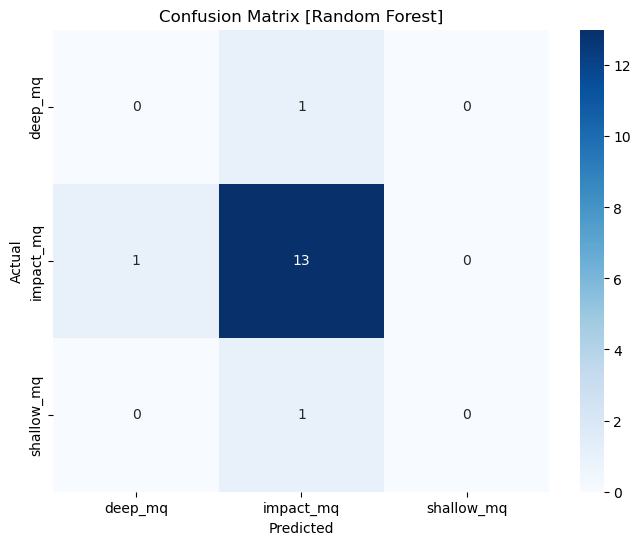

In [14]:
# Create a confusion matrix to visualize the predictions
conf_matrix = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=quake_type_encoder.classes_, yticklabels=quake_type_encoder.classes_)
plt.title('Confusion Matrix [Random Forest]')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

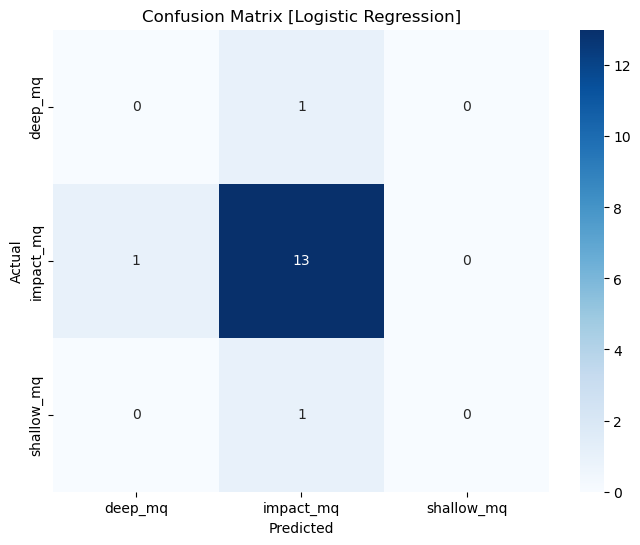

In [15]:
# Create a confusion matrix to visualize the predictions for Logistic Regression
conf_matrix = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=quake_type_encoder.classes_, yticklabels=quake_type_encoder.classes_)
plt.title('Confusion Matrix [Logistic Regression]')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# [Applying STA/LTA Algorithm (Apply a Threshold) ]

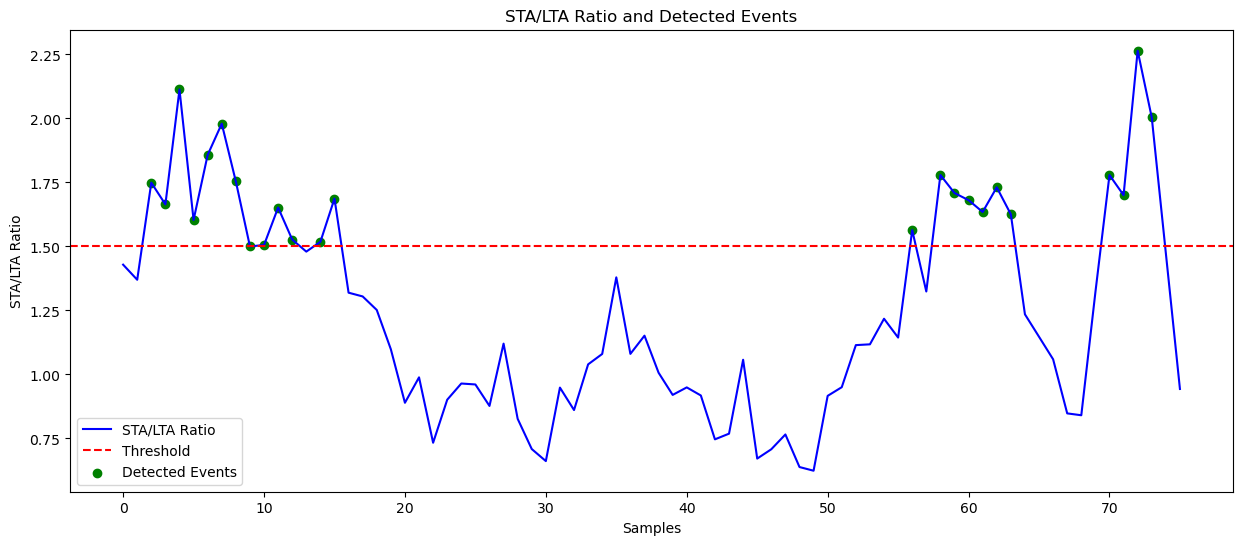

Saved STA/LTA data to detected_events_sta_lta.csv


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Extract the seismic signal (using Rel_Time as an example)
signal = lunar['time_rel(sec)'].values

# Define the STA/LTA function
def sta_lta(signal, sta_len, lta_len):
    sta = np.convolve(signal, np.ones(sta_len) / sta_len, mode='same')
    lta = np.convolve(signal, np.ones(lta_len) / lta_len, mode='same')
    lta[lta == 0] = np.nan
    sta_lta_ratio = sta / lta
    return sta, lta, sta_lta_ratio

# Set lengths for STA and LTA
sta_length = 5
lta_length = 50

# Calculate STA, LTA, and STA/LTA ratio
sta, lta, sta_lta_ratio = sta_lta(signal, sta_length, lta_length)

# Define a threshold for detection
threshold = 1.5
detected_events = sta_lta_ratio > threshold

# Print and save detected event times
event_times = lunar['time_abs(%Y-%m-%dT%H:%M:%S.%f)'][detected_events]
event_times_rel = lunar['time_rel(sec)'][detected_events]
event_files = lunar["filename"][detected_events]

# Create DataFrame for detected events
df_events = pd.DataFrame({
    "File_Name": event_files,
    "Abs_Time": event_times,
    "Rel_Time": event_times_rel,
    "STA": sta[detected_events],
    "LTA": lta[detected_events],
    "STA/LTA Ratio": sta_lta_ratio[detected_events]
})

# Save STA/LTA data to CSV
output_file = 'detected_events_sta_lta.csv'
df_events.to_csv(output_file, index=False)

# Visualize the results
plt.figure(figsize=(15, 6))
plt.plot(sta_lta_ratio, label='STA/LTA Ratio', color='blue')
plt.axhline(threshold, color='red', linestyle='--', label='Threshold')
plt.scatter(np.arange(len(sta_lta_ratio))[detected_events], sta_lta_ratio[detected_events], color='green', label='Detected Events')
plt.title('STA/LTA Ratio and Detected Events')
plt.xlabel('Samples')
plt.ylabel('STA/LTA Ratio')
plt.legend()
plt.show()

print(f"Saved STA/LTA data to {output_file}")


In [17]:
# Print the detected event times
event_times = lunar['time_abs(%Y-%m-%dT%H:%M:%S.%f)'][detected_events]
event_times_rel = lunar['time_rel(sec)'][detected_events]
event_files = lunar["filename"][detected_events]

df = pd.DataFrame({
    "File_Name" : event_files,
    "Abs_Time" : event_times,
    "Rel_Time" : event_times_rel
})
df

,File_Name,Abs_Time,Rel_Time
2,xa.s12.00.mhz.1970-03-26HR00_evid00004,1970-03-26 20:17:00,73020.0
3,xa.s12.00.mhz.1970-04-25HR00_evid00006,1970-04-25 01:14:00,4440.0
4,xa.s12.00.mhz.1970-04-26HR00_evid00007,1970-04-26 14:29:00,52140.0
5,xa.s12.00.mhz.1970-06-15HR00_evid00008,1970-06-15 19:00:00,68400.0
6,xa.s12.00.mhz.1970-06-26HR00_evid00009,1970-06-26 20:01:00,72060.0
7,xa.s12.00.mhz.1970-07-20HR00_evid00010,1970-07-20 05:06:00,18360.0
8,xa.s12.00.mhz.1970-07-20HR00_evid00011,1970-07-20 11:44:00,42240.0
9,xa.s12.00.mhz.1970-09-26HR00_evid00013,1970-09-26 19:57:00,71820.0
10,xa.s12.00.mhz.1970-10-24HR00_evid00014,1970-10-24 11:31:00,41460.0
11,xa.s12.00.mhz.1970-11-12HR00_evid00015,1970-11-12 12:50:00,46200.0


# Machine Learning Model with [STA, LTA, STA/LTA] Features

In [18]:
# Extract the signal (assuming Rel_Time is a numeric signal)
signal = lunar['time_rel(sec)'].values

In [19]:
def sta_lta(signal, sta_len, lta_len):
    # Calculate short-term average (STA)
    sta = np.convolve(signal, np.ones(sta_len) / sta_len, mode='same')

    # Calculate long-term average (LTA)
    lta = np.convolve(signal, np.ones(lta_len) / lta_len, mode='same')

    # Ensure both STA and LTA have the same length by using the shorter one
    min_len = min(len(sta), len(lta))
    sta = sta[:min_len]
    lta = lta[:min_len]
    
    # Avoid division by zero in LTA
    lta[lta == 0] = np.nan
    
    # Calculate STA/LTA ratio
    sta_lta_ratio = sta / lta
    
    return sta, lta, sta_lta_ratio


In [32]:
# Calculate STA, LTA, and STA/LTA ratio
sta_length = 5
lta_length = 50
sta, lta, sta_lta_ratio = sta_lta(signal, sta_length, lta_length)
print(sta)
print(lta)
print(sta_lta_ratio)

[31848. 32736. 43164. 42144. 54012. 43080. 50640. 54576. 49188. 44016.
 45648. 52008. 48936. 49764. 51312. 59220. 47076. 46800. 46980. 41280.
 33888. 38244. 29388. 36168. 38892. 39516. 34884. 45780. 33660. 28932.
 27228. 37800. 34524. 42216. 44772. 55824. 44580. 47856. 41940. 38196.
 38976. 37788. 29952. 29988. 42048. 26004. 27372. 30192. 25644. 25080.
 37692. 37788. 43452. 42852. 46392. 42096. 56916. 47784. 63360. 58644.
 56040. 52596. 54720. 48816. 36876. 32760. 29640. 23568. 21972. 34452.
 45468. 42480. 53412. 47160. 34404. 21264.]
[22286.4 23894.4 24675.6 25320.  25558.8 26864.4 27260.4 27568.8 28042.8
 29338.8 30316.8 31482.  32046.  33625.2 33796.8 35102.4 35676.  35865.6
 37522.8 37575.6 38097.6 38674.8 40070.4 40123.2 40312.8 41116.8 39769.2
 40854.  40707.6 40818.  41145.6 39840.  40092.  40609.2 41445.6 40466.4
 41257.2 41554.8 41648.4 41504.4 41044.8 41162.4 40111.2 39002.4 39760.8
 38721.6 38661.6 39428.4 40160.4 40184.4 41124.  39760.8 38979.6 38335.2
 38096.4 36790.8 3639

In [21]:
# Add features to the DataFrame
lunar['STA'] = sta
lunar['LTA'] = lta
lunar['STA/LTA'] = sta_lta_ratio

In [22]:
lunar.head()

,filename,time_abs(%Y-%m-%dT%H:%M:%S.%f),time_rel(sec),evid,mq_type,Hour,Day,Month,Year,File_Name_Encoded,MQ_Type_Encoded,STA,LTA,STA/LTA
0,xa.s12.00.mhz.1970-01-19HR00_evid00002,1970-01-19 20:25:00,73500.0,evid00002,impact_mq,20,19,1,1970,0,1,31848.0,22286.4,1.429033
1,xa.s12.00.mhz.1970-03-25HR00_evid00003,1970-03-25 03:32:00,12720.0,evid00003,impact_mq,3,25,3,1970,1,1,32736.0,23894.4,1.370028
2,xa.s12.00.mhz.1970-03-26HR00_evid00004,1970-03-26 20:17:00,73020.0,evid00004,impact_mq,20,26,3,1970,2,1,43164.0,24675.6,1.749258
3,xa.s12.00.mhz.1970-04-25HR00_evid00006,1970-04-25 01:14:00,4440.0,evid00006,impact_mq,1,25,4,1970,3,1,42144.0,25320.0,1.664455
4,xa.s12.00.mhz.1970-04-26HR00_evid00007,1970-04-26 14:29:00,52140.0,evid00007,deep_mq,14,26,4,1970,4,0,54012.0,25558.8,2.113245


In [23]:
lunar.shape

(76, 14)

In [24]:
lunar[lunar["STA/LTA"] > 1]

,filename,time_abs(%Y-%m-%dT%H:%M:%S.%f),time_rel(sec),evid,mq_type,Hour,Day,Month,Year,File_Name_Encoded,MQ_Type_Encoded,STA,LTA,STA/LTA
0,xa.s12.00.mhz.1970-01-19HR00_evid00002,1970-01-19 20:25:00,73500.0,evid00002,impact_mq,20,19,1,1970,0,1,31848.0,22286.4,1.429033
1,xa.s12.00.mhz.1970-03-25HR00_evid00003,1970-03-25 03:32:00,12720.0,evid00003,impact_mq,3,25,3,1970,1,1,32736.0,23894.4,1.370028
2,xa.s12.00.mhz.1970-03-26HR00_evid00004,1970-03-26 20:17:00,73020.0,evid00004,impact_mq,20,26,3,1970,2,1,43164.0,24675.6,1.749258
3,xa.s12.00.mhz.1970-04-25HR00_evid00006,1970-04-25 01:14:00,4440.0,evid00006,impact_mq,1,25,4,1970,3,1,42144.0,25320.0,1.664455
4,xa.s12.00.mhz.1970-04-26HR00_evid00007,1970-04-26 14:29:00,52140.0,evid00007,deep_mq,14,26,4,1970,4,0,54012.0,25558.8,2.113245
5,xa.s12.00.mhz.1970-06-15HR00_evid00008,1970-06-15 19:00:00,68400.0,evid00008,impact_mq,19,15,6,1970,5,1,43080.0,26864.4,1.603609
6,xa.s12.00.mhz.1970-06-26HR00_evid00009,1970-06-26 20:01:00,72060.0,evid00009,impact_mq,20,26,6,1970,6,1,50640.0,27260.4,1.857640
7,xa.s12.00.mhz.1970-07-20HR00_evid00010,1970-07-20 05:06:00,18360.0,evid00010,impact_mq,5,20,7,1970,7,1,54576.0,27568.8,1.979629
8,xa.s12.00.mhz.1970-07-20HR00_evid00011,1970-07-20 11:44:00,42240.0,evid00011,deep_mq,11,20,7,1970,8,0,49188.0,28042.8,1.754033
9,xa.s12.00.mhz.1970-09-26HR00_evid00013,1970-09-26 19:57:00,71820.0,evid00013,impact_mq,19,26,9,1970,9,1,44016.0,29338.8,1.500266


In [25]:
lunar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   filename                        76 non-null     object        
 1   time_abs(%Y-%m-%dT%H:%M:%S.%f)  76 non-null     datetime64[ns]
 2   time_rel(sec)                   76 non-null     float64       
 3   evid                            76 non-null     object        
 4   mq_type                         76 non-null     object        
 5   Hour                            76 non-null     int64         
 6   Day                             76 non-null     int64         
 7   Month                           76 non-null     int64         
 8   Year                            76 non-null     int64         
 9   File_Name_Encoded               76 non-null     int32         
 10  MQ_Type_Encoded                 76 non-null     int32         
 11  STA     

In [26]:
lunar.describe().T

,count,mean,std,min,25%,50%,75%,max
time_rel(sec),76.0,41878.421053,25254.710085,1380.000000,19440.000000,42870.000000,65385.00000,84660.000000
Hour,76.0,11.171053,7.079337,0.000000,5.000000,11.500000,18.00000,23.000000
Day,76.0,17.500000,8.487638,1.000000,12.000000,17.500000,25.00000,31.000000
Month,76.0,5.763158,3.067544,1.000000,3.750000,6.000000,7.00000,12.000000
Year,76.0,1972.118421,1.566032,1970.000000,1971.000000,1972.000000,1973.00000,1975.000000
File_Name_Encoded,76.0,37.500000,22.083176,0.000000,18.750000,37.500000,56.25000,75.000000
MQ_Type_Encoded,76.0,0.921053,0.392026,0.000000,1.000000,1.000000,1.00000,2.000000
STA,76.0,41241.631579,9773.147935,21264.000000,34275.000000,42120.000000,47802.00000,63360.000000
LTA,76.0,34536.063158,6286.248910,22286.400000,28425.300000,36592.800000,40114.20000,41648.400000
STA/LTA,76.0,1.242699,0.399539,0.624123,0.919722,1.145774,1.57379,2.264679


In [27]:
# Create the target variable (assuming Quake_Type is your label)
X = lunar[['STA', 'LTA', 'STA/LTA']]  # Features
y = lunar['MQ_Type_Encoded']  # Labels

In [28]:
# Step 7: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Step 8: Train the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [30]:
# Make Predictions
y_pred = model.predict(X_test)

# Evaluate the Model
print(f"Accuracy = {accuracy_score(y_test, y_pred) * 100 :.2F} %")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
print(f"\nClassification Report:\n{classification_report(y_test, y_pred)}")

Accuracy = 81.25 %
Confusion Matrix:
[[ 0  1  0]
 [ 1 13  0]
 [ 0  1  0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.87      0.93      0.90        14
           2       0.00      0.00      0.00         1

    accuracy                           0.81        16
   macro avg       0.29      0.31      0.30        16
weighted avg       0.76      0.81      0.78        16



C:\Users\mr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


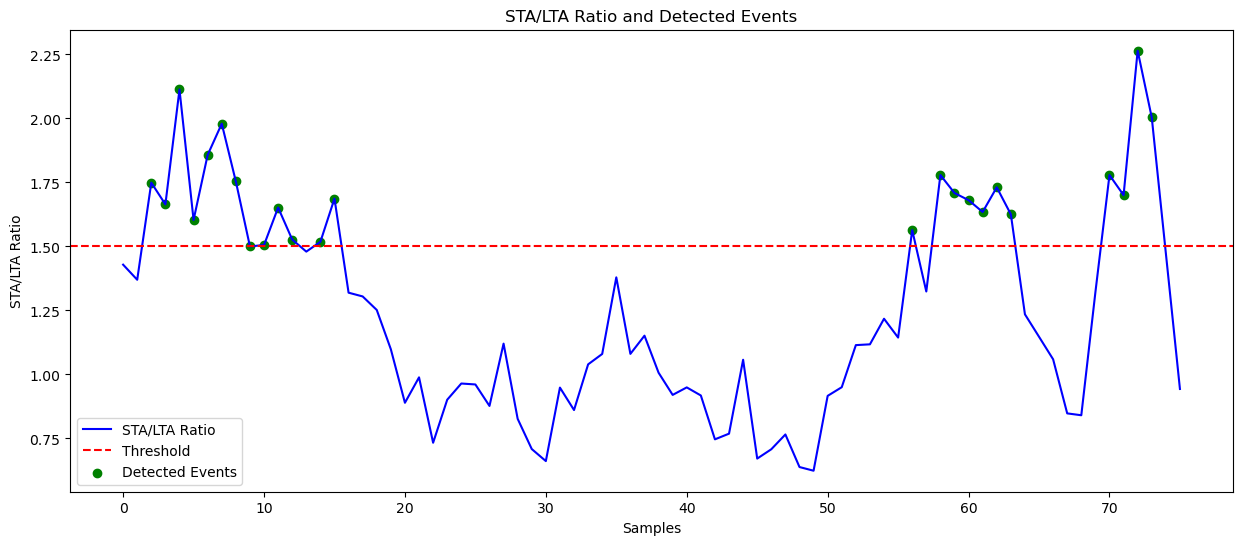

In [31]:
# Plot the STA/LTA Ratio and Detected Events
plt.figure(figsize=(15, 6))

# Plot STA/LTA ratio
plt.plot(sta_lta_ratio, label='STA/LTA Ratio', color='blue')
plt.axhline(1.5, color='red', linestyle='--', label='Threshold')  # Change threshold if needed

# Highlight detected events based on the threshold
detected_events = sta_lta_ratio > 1.5
plt.scatter(np.arange(len(sta_lta_ratio))[detected_events], sta_lta_ratio[detected_events], color='green', label='Detected Events')

plt.title('STA/LTA Ratio and Detected Events')
plt.xlabel('Samples')
plt.ylabel('STA/LTA Ratio')
plt.legend()
plt.show()

# Testing

## Combine all Test Files into one file

In [36]:
import os
import pandas as pd

# Directory containing the CSV files
directory = 'D:\\NASA Challenge\\space_apps_2024_seismic_detection\\data\\lunar\\test\\data\\S12_GradeB\\'
combined_data = []

for file in os.listdir(directory):
    if file.endswith('.csv'):
        # Try reading the CSV file using engine='python'
        try:
            df = pd.read_csv(os.path.join(directory, file), engine='python')
            combined_data.append(df)
        except pd.errors.ParserError as e:
            print(f"Error parsing {file}: {e}")

# Combine all dataframes into one
if combined_data:
    combined_df = pd.concat(combined_data, ignore_index=True)
    print("Successfully combined all CSV files.")
else:
    print("No valid CSV files to combine.")


Successfully combined all CSV files.


In [33]:
S12_GradeB = pd.read_csv("S12_GradeB.csv")

In [34]:
S12_GradeB.head()

,time_abs(%Y-%m-%dT%H:%M:%S.%f),time_rel(sec),velocity(m/s)
0,1969-12-16T00:00:00.178000,0.000000,0.000000e+00
1,1969-12-16T00:00:00.328943,0.150943,-5.576940e-15
2,1969-12-16T00:00:00.479887,0.301887,-1.115388e-14
3,1969-12-16T00:00:00.630830,0.452830,-1.673082e-14
4,1969-12-16T00:00:00.781774,0.603774,-2.230776e-14


### Test on File [S12_GradeB]

In [35]:
signal = S12_GradeB['time_rel(sec)'].values

In [36]:
# Set lengths for STA and LTA
sta_length = 5    # Short-term average window length
lta_length = 50   # Long-term average window length

# Calculate STA, LTA, and STA/LTA ratio
sta, lta, sta_lta_ratio = sta_lta(signal, sta_length, lta_length)

In [37]:
# Define a threshold for detection
threshold = 1.5

# Create an array for event detection based on the threshold
detected_events = sta_lta_ratio > threshold

In [38]:
# Print the detected event times
event_times = S12_GradeB['time_abs(%Y-%m-%dT%H:%M:%S.%f)'][detected_events]
print(f"Detected Events:\n{event_times}")

Detected Events:
572415     1969-12-17T00:00:02.442151
572416     1969-12-17T00:00:02.593094
572417     1969-12-17T00:00:02.744038
572418     1969-12-17T00:00:02.894981
572419     1969-12-17T00:00:03.045925
572420     1969-12-17T00:00:03.196868
1144838    1970-01-10T00:00:02.390151
1144839    1970-01-10T00:00:02.541094
1144840    1970-01-10T00:00:02.692038
1144841    1970-01-10T00:00:02.842981
1144842    1970-01-10T00:00:02.993925
1144843    1970-01-10T00:00:03.144868
1717261    1970-02-08T00:00:02.835151
1717262    1970-02-08T00:00:02.986094
1717263    1970-02-08T00:00:03.137038
1717264    1970-02-08T00:00:03.287981
1717265    1970-02-08T00:00:03.438925
1717266    1970-02-08T00:00:03.589868
2289676    1970-02-19T00:00:01.205604
2289677    1970-02-19T00:00:01.356547
2289678    1970-02-19T00:00:01.507491
2289679    1970-02-19T00:00:01.658434
2289680    1970-02-19T00:00:01.809377
2289681    1970-02-19T00:00:01.960321
2862099    1970-03-15T00:00:02.784151
2862100    1970-03-15T00:00:02.93

In [39]:
# Print the detected event times
event_times = S12_GradeB['time_abs(%Y-%m-%dT%H:%M:%S.%f)'][detected_events]
event_times_rel = S12_GradeB['time_rel(sec)'][detected_events]

df = pd.DataFrame({
    "Abs_Time" : event_times,
    "Rel_Time" : event_times_rel
})
df

,Abs_Time,Rel_Time
572415,1969-12-17T00:00:02.442151,86402.264151
572416,1969-12-17T00:00:02.593094,86402.415094
572417,1969-12-17T00:00:02.744038,86402.566038
572418,1969-12-17T00:00:02.894981,86402.716981
572419,1969-12-17T00:00:03.045925,86402.867925
572420,1969-12-17T00:00:03.196868,86403.018868
1144838,1970-01-10T00:00:02.390151,86402.264151
1144839,1970-01-10T00:00:02.541094,86402.415094
1144840,1970-01-10T00:00:02.692038,86402.566038
1144841,1970-01-10T00:00:02.842981,86402.716981


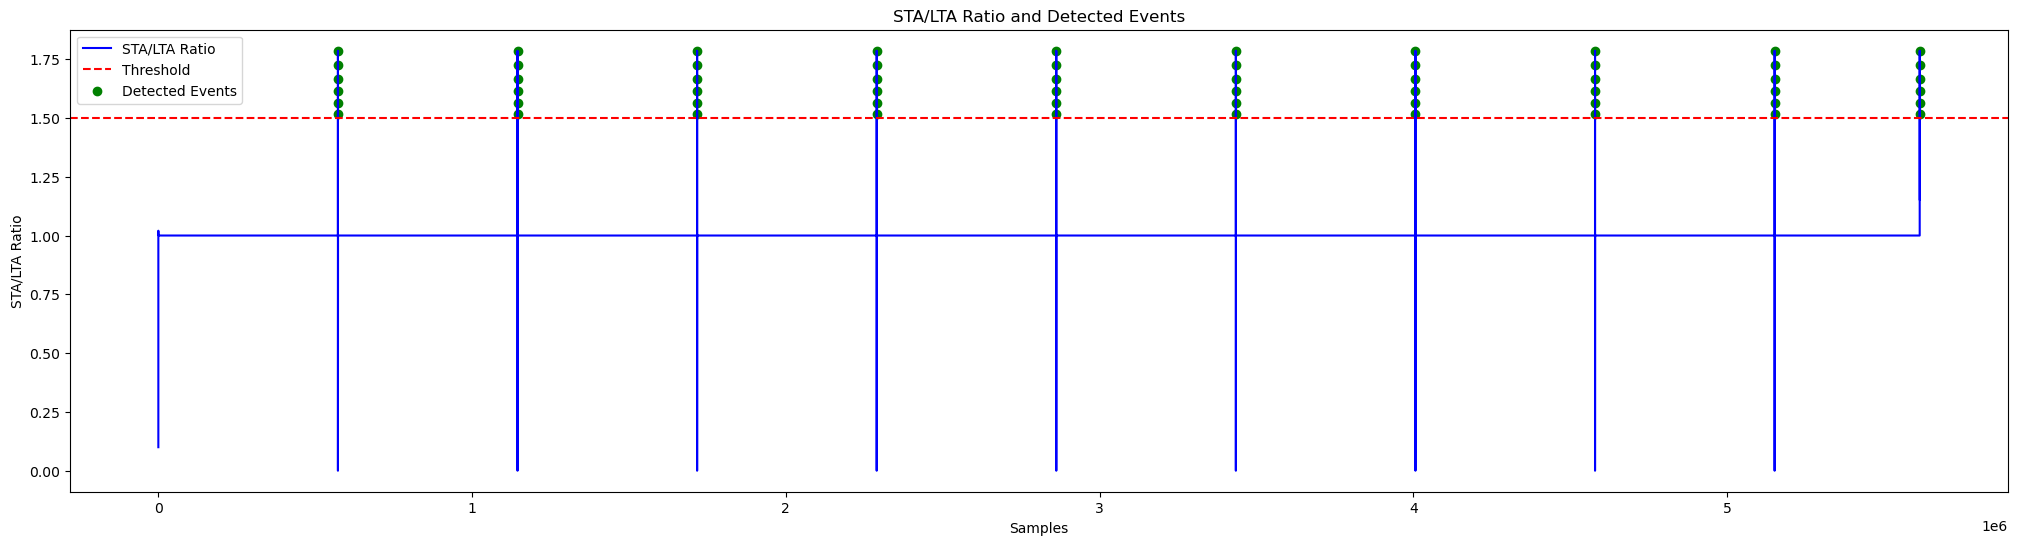

In [40]:
# Step 6: Visualize the results
plt.figure(figsize=(25, 6))

# Plot STA/LTA ratio
plt.plot(sta_lta_ratio, label='STA/LTA Ratio', color='blue')
plt.axhline(threshold, color='red', linestyle='--', label='Threshold')

# Highlight detected events
plt.scatter(np.arange(len(sta_lta_ratio))[detected_events], sta_lta_ratio[detected_events], color='green', label='Detected Events')

plt.title('STA/LTA Ratio and Detected Events')
plt.xlabel('Samples')
plt.ylabel('STA/LTA Ratio')
plt.legend()
plt.show()

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from obspy.signal.trigger import classic_sta_lta, trigger_onset

def apply_sta_lta(csv_file, sta_len=120, lta_len=600, sampling_rate=100, threshold=2.0):
    """
    Function to read a CSV file, apply STA/LTA, detect events, and output results.
    
    Parameters:
    csv_file (str): Path to the CSV file.
    sta_len (int): Length of the short-term window in seconds.
    lta_len (int): Length of the long-term window in seconds.
    sampling_rate (int): Sampling frequency of the data in Hz.
    threshold (float): STA/LTA threshold for event detection.
    
    Returns:
    pd.DataFrame: DataFrame with detected events.
    """
    
    # Step 1: Read the CSV file
    data = pd.read_csv(csv_file)
    
    # Check if required columns are present in the CSV file
    if 'time_rel(sec)' not in data.columns or 'velocity(m/s)' not in data.columns:
        raise ValueError(f"CSV file {csv_file} must contain 'Rel_Time' and 'Velocity' columns.")
    
    # Step 2: Extract relevant columns
    rel_time = data['time_rel(sec)'].values  # Time data (X-axis)
    velocity = data['velocity(m/s)'].values  # Seismic amplitude or velocity (Y-axis)
    
    # Step 3: Calculate STA/LTA using Obspy's function
    sta_samples = int(sta_len * sampling_rate)  # Convert seconds to samples
    lta_samples = int(lta_len * sampling_rate)  # Convert seconds to samples
    
    # Apply classic STA/LTA to the velocity data
    cft = classic_sta_lta(velocity, sta_samples, lta_samples)
    
    # Step 4: Detect events based on the STA/LTA characteristic function
    onsets = trigger_onset(cft, threshold, threshold / 2)  # Get onset and end times of events
    
    # Step 5: Prepare output data for detected events
    event_data = []
    for onset in onsets:
        start_time = rel_time[onset[0]]
        event_data.append({
            'filename': csv_file,
            'time_rel': start_time  # You can adjust this to include absolute time if available
        })
    
    # Create a DataFrame for the output catalog
    output_df = pd.DataFrame(event_data)
    
    # Save the output catalog to a CSV file
    output_file = f"detected_events_{csv_file.split('/')[-1].replace('.csv', '')}.csv"
    output_df.to_csv(output_file, index=False)
    

    
    return output_df  # Return the DataFrame for further use if needed

# Example usage
csv_file_path = 'S12_gradeB.csv'  # Replace with the actual path to your CSV file
output_df = apply_sta_lta(csv_file_path, sta_len=120, lta_len=600, sampling_rate=100, threshold=2.0)
output_df

,filename,time_rel
0,S12_gradeB.csv,18117.132075
1,S12_gradeB.csv,23982.188679
2,S12_gradeB.csv,38055.849057
3,S12_gradeB.csv,84619.471698
4,S12_gradeB.csv,7565.584906
5,S12_gradeB.csv,37547.924528
6,S12_gradeB.csv,2179.018868
7,S12_gradeB.csv,53577.207547
8,S12_gradeB.csv,68123.924528
9,S12_gradeB.csv,4330.867925


In [44]:
import matplotlib.pyplot as plt
import pandas as pd
from obspy.signal.trigger import classic_sta_lta, trigger_onset
from scipy.signal import butter, filtfilt

def highpass_filter(data, cutoff, fs, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    filtered_data = filtfilt(b, a, data)
    return filtered_data

def apply_sta_lta(csv_file, sta_len=120, lta_len=600, sampling_rate=100, threshold=2.0):
    # Step 1: Read the CSV file
    data = pd.read_csv(csv_file)
    
    # Step 2: Extract relevant columns
    rel_time = data['time_rel(sec)'].values  # Time data (X-axis)
    velocity = data['velocity(m/s)'].values  # Seismic amplitude or velocity (Y-axis)
    
    # Step 3: Preprocess the data (highpass filtering)
    velocity_filtered = highpass_filter(velocity, cutoff=1.0, fs=sampling_rate)
    
    # Step 4: Calculate STA/LTA
    sta_samples = int(sta_len * sampling_rate)
    lta_samples = int(lta_len * sampling_rate)
    cft = classic_sta_lta(velocity_filtered, sta_samples, lta_samples)
    
    # Step 5: Detect events based on threshold
    onsets = trigger_onset(cft, threshold, threshold / 2)
    

# Example usage
csv_file_path = 'S12_GradeB.csv'  # Replace with actual CSV path
apply_sta_lta(csv_file_path, sta_len=120, lta_len=600, sampling_rate=100, threshold=2.0)

### Test on Mars Data

In [50]:
# Specify the directory where the CSV files are located
directory = 'D:\\NASA Challenge\\space_apps_2024_seismic_detection\\data\\mars\\test\\data\\'

# Create an empty list to hold the dataframes
combined_data = []

# Loop through all files in the directory
for file in os.listdir(directory):
    if file.endswith('.csv'):
        # Read each CSV file
        df = pd.read_csv(os.path.join(directory, file))
        combined_data.append(df)

# Combine all dataframes into one
Mars = pd.concat(combined_data, ignore_index=True)

# Save the combined dataframe to a new CSV file
Mars.to_csv('Mars Test.csv', index=False)

print("Files combined successfully!")

Files combined successfully!


In [47]:
Mars = pd.read_csv('Mars Test.csv')

In [48]:
Mars.head()

,time(%Y-%m-%dT%H:%M:%S.%f),rel_time(sec),velocity(c/s)
0,2019-05-23T02:00:00.032000,0.00,-0.000000
1,2019-05-23T02:00:00.082000,0.05,0.000199
2,2019-05-23T02:00:00.132000,0.10,-0.001630
3,2019-05-23T02:00:00.182000,0.15,-0.000875
4,2019-05-23T02:00:00.232000,0.20,-0.006137


In [49]:
Mars["velocity(m/s)"] = Mars["velocity(c/s)"] / 100

In [50]:
Mars.head()

,time(%Y-%m-%dT%H:%M:%S.%f),rel_time(sec),velocity(c/s),velocity(m/s)
0,2019-05-23T02:00:00.032000,0.00,-0.000000,-0.000000
1,2019-05-23T02:00:00.082000,0.05,0.000199,0.000002
2,2019-05-23T02:00:00.132000,0.10,-0.001630,-0.000016
3,2019-05-23T02:00:00.182000,0.15,-0.000875,-0.000009
4,2019-05-23T02:00:00.232000,0.20,-0.006137,-0.000061


In [51]:
# Extract the signal (assuming Rel_Time is a numeric signal)
signal = Mars['rel_time(sec)'].values

In [52]:
# Set lengths for STA and LTA
sta_length = 5    # Short-term average window length
lta_length = 50   # Long-term average window length

# Calculate STA, LTA, and STA/LTA ratio
sta, lta, sta_lta_ratio = sta_lta(signal, sta_length, lta_length)

# Define a threshold for detection
threshold = 1.5

# Create an array for event detection based on the threshold
detected_events = sta_lta_ratio > threshold

In [53]:
# Print the detected event times
event_times = Mars['time(%Y-%m-%dT%H:%M:%S.%f)'][detected_events]
print(f"Detected Events:\n{event_times}")

Detected Events:
71992     2019-05-23T02:59:59.632000
71993     2019-05-23T02:59:59.682000
71994     2019-05-23T02:59:59.732000
71995     2019-05-23T02:59:59.782000
71996     2019-05-23T02:59:59.832000
71997     2019-05-23T02:59:59.882000
143992    2019-07-26T12:59:59.610000
143993    2019-07-26T12:59:59.660000
143994    2019-07-26T12:59:59.710000
143995    2019-07-26T12:59:59.760000
143996    2019-07-26T12:59:59.810000
143997    2019-07-26T12:59:59.860000
215992    2019-07-26T12:59:59.610000
215993    2019-07-26T12:59:59.660000
215994    2019-07-26T12:59:59.710000
215995    2019-07-26T12:59:59.760000
215996    2019-07-26T12:59:59.810000
215997    2019-07-26T12:59:59.860000
287992    2019-09-21T03:59:59.637000
287993    2019-09-21T03:59:59.687000
287994    2019-09-21T03:59:59.737000
287995    2019-09-21T03:59:59.787000
287996    2019-09-21T03:59:59.837000
287997    2019-09-21T03:59:59.887000
359992    2021-05-02T01:59:59.625000
359993    2021-05-02T01:59:59.675000
359994    2021-05-02T

In [54]:
# Print the detected event times
event_times = Mars['time(%Y-%m-%dT%H:%M:%S.%f)'][detected_events]
event_times_rel = Mars['rel_time(sec)'][detected_events]

df = pd.DataFrame({
    "Abs_Time" : event_times,
    "Rel_Time" : event_times_rel
})
df

,Abs_Time,Rel_Time
71992,2019-05-23T02:59:59.632000,3599.60
71993,2019-05-23T02:59:59.682000,3599.65
71994,2019-05-23T02:59:59.732000,3599.70
71995,2019-05-23T02:59:59.782000,3599.75
71996,2019-05-23T02:59:59.832000,3599.80
71997,2019-05-23T02:59:59.882000,3599.85
143992,2019-07-26T12:59:59.610000,3599.60
143993,2019-07-26T12:59:59.660000,3599.65
143994,2019-07-26T12:59:59.710000,3599.70
143995,2019-07-26T12:59:59.760000,3599.75


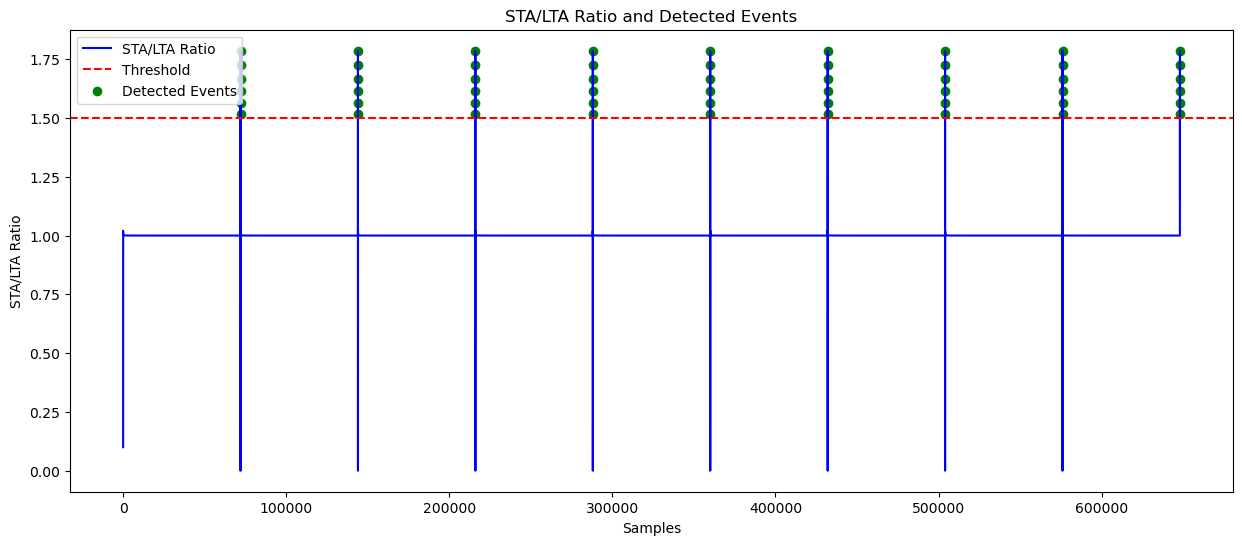

In [55]:
# Visualize the results
plt.figure(figsize=(15, 6))

# Plot STA/LTA ratio
plt.plot(sta_lta_ratio, label='STA/LTA Ratio', color='blue')
plt.axhline(threshold, color='red', linestyle='--', label='Threshold')

# Highlight detected events
plt.scatter(np.arange(len(sta_lta_ratio))[detected_events], sta_lta_ratio[detected_events], color='green', label='Detected Events')

plt.title('STA/LTA Ratio and Detected Events')
plt.xlabel('Samples')
plt.ylabel('STA/LTA Ratio')
plt.legend()
plt.show()